In [23]:
%matplotlib inline

import datetime
import pandas
import numpy
import matplotlib.pyplot as plot
import math
import seaborn

In [24]:
# station = pandas.read_csv('station.csv', low_memory=False)
trip = pandas.read_csv('trip.csv', low_memory=False)
weather = pandas.read_csv('weather.csv', low_memory=False)

In [25]:
# status = pandas.read_csv('status.csv', low_memory=True)

In [26]:
trip.start_date = trip.start_date.apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") if x else x)

In [27]:
trip.end_date = trip.end_date.apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") if x else x)

In [29]:
def is_int(x):
    try:
        int(x)
    except:
        return False
    return True

trip = trip[trip['zip_code'].apply(lambda x: True if is_int(x) else False)]

In [30]:
trip['date'] = trip['start_date'].apply(lambda x: x.date())

/Users/dylanalvarez/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
trip = trip.groupby(['date', 'zip_code']).agg(['mean', 'sum','count'])
trip['mean_duration_sec'] = trip['duration']['mean']
trip['trip_count'] = trip['duration']['count']
trip = trip.loc[:,['mean_duration_sec', 'trip_count']]
trip = trip.reset_index()
trip['zip_code'] = trip['zip_code'].apply(lambda x: int(x))
trip.columns = trip.columns.droplevel(1)
trip

,date,zip_code,mean_duration_sec,trip_count
0,2013-08-29,10003,1127.250000,4
1,2013-08-29,10009,958.333333,3
2,2013-08-29,10010,3287.666667,3
3,2013-08-29,10012,912.000000,1
4,2013-08-29,10014,727.000000,1
5,2013-08-29,10023,3362.000000,1
6,2013-08-29,10514,1244.500000,4
7,2013-08-29,1719,656.500000,6
8,2013-08-29,19714,1329.750000,4
9,2013-08-29,20002,1073.000000,4


In [32]:
weather['date'] = weather['date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").date() if x else x)

In [33]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

weather = weather[weather['precipitation_inches'].apply(lambda x: True if is_float(x) else False)]
weather['precipitation_inches'] = weather['precipitation_inches'].apply(lambda x: float(x))

In [34]:
weather['events'].unique()

array([nan, 'Fog', 'Rain', 'rain', 'Fog-Rain', 'Rain-Thunderstorm'], dtype=object)

In [35]:
weather['events'] = weather['events'].apply(lambda x: 'Rain' if x == 'rain' else x)

In [36]:
weather['Fog'] = weather['events'].apply(lambda x: x == 'Fog' or x == 'Fog-Rain')
weather['Rain'] = weather['events'].apply(lambda x: x == 'Rain' or x == 'Fog-Rain' or x == 'Rain-Thunderstorm')
weather['Thunderstorm'] = weather['events'].apply(lambda x: x == 'Rain-Thunderstorm')
weather = weather.drop('events', 1)
weather

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code,Fog,Rain,Thunderstorm
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,23.0,11.0,28.0,0.00,4.0,286.0,94107,False,False,False
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,29.0,13.0,35.0,0.00,2.0,291.0,94107,False,False,False
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,26.0,15.0,31.0,0.00,4.0,284.0,94107,False,False,False
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,25.0,13.0,29.0,0.00,4.0,284.0,94107,False,False,False
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,23.0,12.0,30.0,0.00,6.0,277.0,94107,False,False,False
5,2013-09-03,73.0,67.0,60.0,59.0,56.0,51.0,84.0,65.0,46.0,...,24.0,15.0,31.0,0.00,2.0,276.0,94107,False,False,False
6,2013-09-04,74.0,68.0,61.0,59.0,57.0,56.0,90.0,72.0,53.0,...,29.0,19.0,35.0,0.00,4.0,269.0,94107,False,False,False
7,2013-09-05,72.0,66.0,60.0,57.0,56.0,54.0,90.0,74.0,57.0,...,31.0,21.0,37.0,0.00,3.0,270.0,94107,False,False,False
8,2013-09-06,85.0,71.0,56.0,57.0,51.0,45.0,86.0,58.0,29.0,...,24.0,8.0,28.0,0.00,0.0,287.0,94107,False,False,False
9,2013-09-07,88.0,73.0,58.0,64.0,54.0,46.0,86.0,59.0,31.0,...,21.0,8.0,25.0,0.00,1.0,305.0,94107,False,False,False


In [37]:
trips_and_weather = pandas.merge(weather, trip, how='inner', on=['date', 'zip_code'])

In [38]:
weather_corr = trips_and_weather.corr().abs().loc[:,['mean_duration_sec', 'trip_count']]

In [39]:
weather_corr = weather_corr[weather_corr.index != 'mean_duration_sec']
weather_corr = weather_corr[weather_corr.index != 'trip_count']
weather_corr = weather_corr[weather_corr.index != 'zip_code']

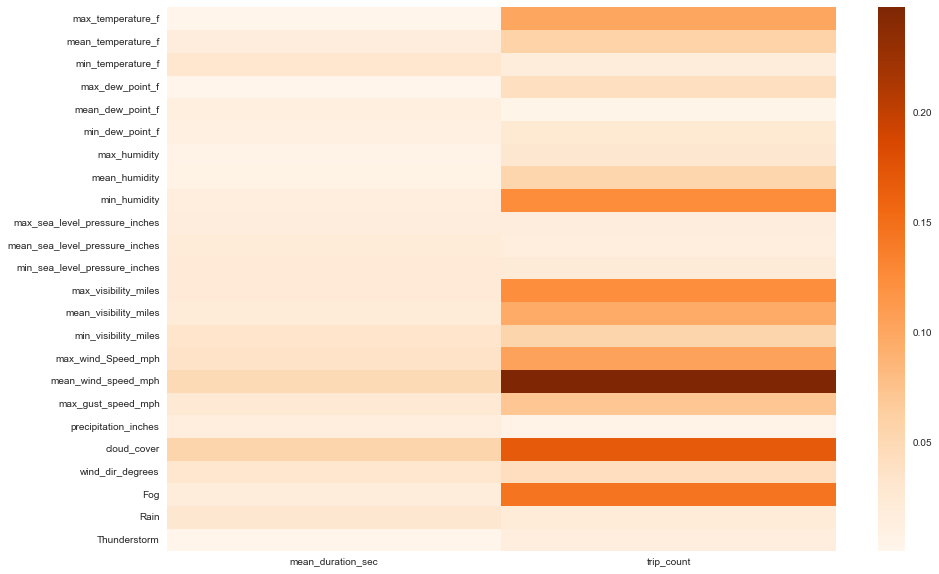

In [40]:
plot.rcParams['figure.figsize'] = (15, 10)
seaborn.heatmap(weather_corr,cmap='Oranges');

In [41]:
weather_corr.sort_values(by='trip_count', ascending=False)

,mean_duration_sec,trip_count
mean_wind_speed_mph,0.049016,0.247870
cloud_cover,0.055502,0.169627
Fog,0.018929,0.146575
min_humidity,0.014989,0.124748
max_visibility_miles,0.023213,0.123709
max_wind_Speed_mph,0.035793,0.104249
max_temperature_f,0.001461,0.100533
mean_visibility_miles,0.021452,0.096859
max_gust_speed_mph,0.025774,0.071621
mean_temperature_f,0.017496,0.059336


### Pareciera que el clima no afecta fuertemente la duración de los viajes, pero sí su cantidad. El órden por relevancia sería:
    
Si hay mucho viento:    

In [42]:
def line_graph(df, x, y):
    df = trips_and_weather.loc[:,[x, y]]
    df = df.groupby([x]).agg(['sum'])
    df = df.reset_index()
    df.columns = df.columns.droplevel(1)
    df.plot(x=x, y=y)

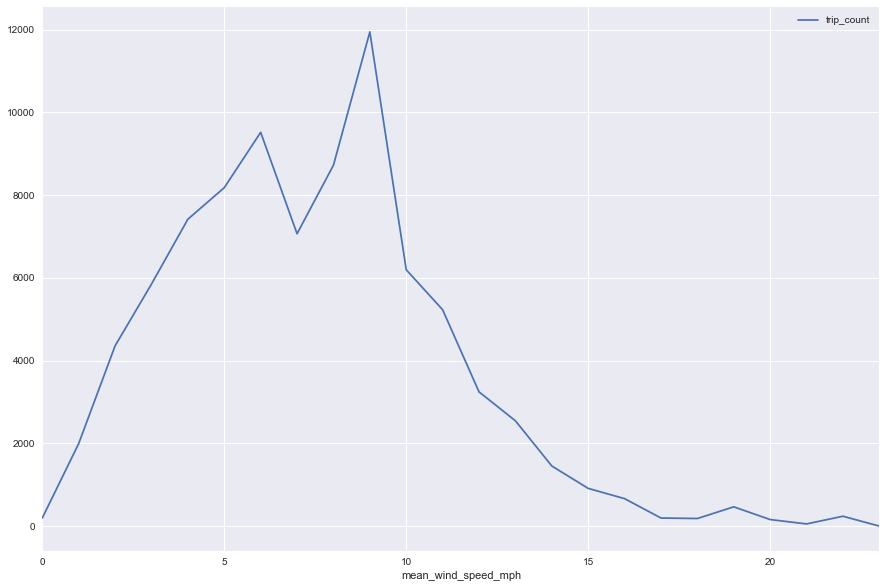

In [47]:
line_graph(trips_and_weather, 'mean_wind_speed_mph', 'trip_count')

Si está muy nublado:    

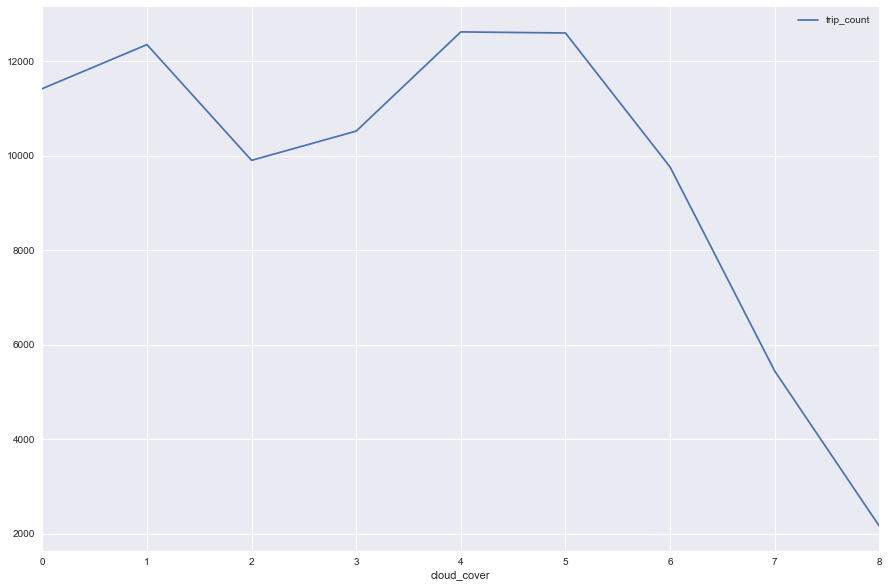

In [48]:
line_graph(trips_and_weather, 'cloud_cover', 'trip_count')

Si hay niebla:    

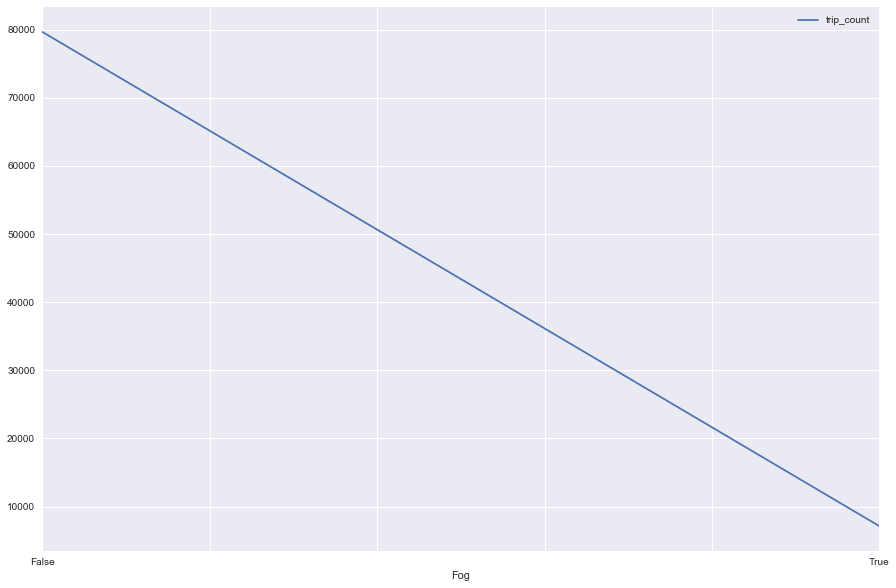

In [49]:
line_graph(trips_and_weather, 'Fog', 'trip_count')  # TODO: use a more suitable graph

El máximo de visibilidad y el mínimo de humedad:    

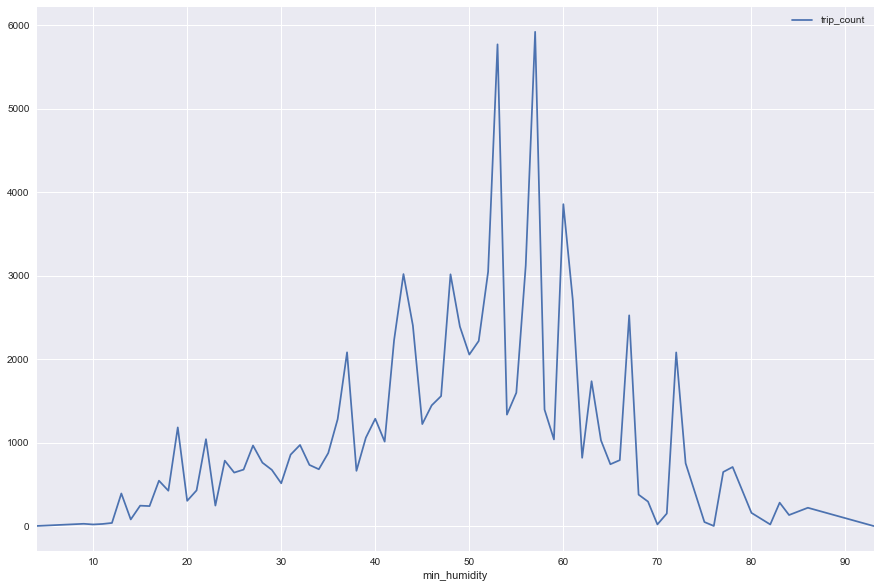

In [50]:
line_graph(trips_and_weather, 'min_humidity', 'trip_count')  # TODO: use a more suitable graph